# Natural Language Processing

In [1]:
import os
import re
import datetime as dt
from time import time, strftime
import random
import string
from pprint import pprint

# encoding
import ftfy
import html

# data science
import math
import numpy as np
import pandas as pd
import scipy.stats as st

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim

/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# configurations
# style for data visualizations
plt.style.use('fivethirtyeight')
%matplotlib inline
sns.set()

# Allow multiple outputs for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# suppress auto-conversion to scientific notation
pd.set_option('display.precision', 6)

# log events
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
tweets = pd.read_csv('Data/tweets2.csv', encoding='utf-8', parse_dates=True)

## Preprocessing

In [4]:
tweets['created'] = pd.to_datetime(tweets['created'])

In [5]:
tweets.head()
tweets.dtypes

,tweetId,screenName,text,replyToSN,isRetweet,truncated,retweetCount,favoriteCount,created,longitude,latitude
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN
1,2,JesusPrepper74,@johnconyersjr @alfranken why have you guys ...,johnconyersjr,0,0,0,0,2017-11-29 23:59:00,NaN,NaN
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this A.M. if...,NaN,0,1,0,0,2017-11-29 23:59:00,NaN,NaN
3,4,TheDawnStott,Women have been talking about this crap the en...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN
4,5,scottygirl2014,.@BetteMidler please speak to this sexual assa...,NaN,0,0,11,15,2017-11-29 23:59:00,NaN,NaN


tweetId                   int64
screenName               object
text                     object
replyToSN                object
isRetweet                 int64
truncated                 int64
retweetCount              int64
favoriteCount             int64
created          datetime64[ns]
longitude               float64
latitude                float64
dtype: object

In [6]:
tweets['fixed'] = [ftfy.fix_text(tweet) for tweet in tweets['text'].values.tolist()]

In [7]:
tweets['text'] = tweets['fixed']
tweets.drop('fixed', 1, inplace=True)

In [8]:
tweets.head()

,tweetId,screenName,text,replyToSN,isRetweet,truncated,retweetCount,favoriteCount,created,longitude,latitude
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN
1,2,JesusPrepper74,@johnconyersjr @alfranken why have you guys ...,johnconyersjr,0,0,0,0,2017-11-29 23:59:00,NaN,NaN
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this A.M. if...,NaN,0,1,0,0,2017-11-29 23:59:00,NaN,NaN
3,4,TheDawnStott,Women have been talking about this crap the en...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN
4,5,scottygirl2014,.@BetteMidler please speak to this sexual assa...,NaN,0,0,11,15,2017-11-29 23:59:00,NaN,NaN


## Sentiment Analysis

In [9]:
analyzer = SentimentIntensityAnalyzer()
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in tweets['text'].values.tolist()]

In [10]:
len(scores) == len(tweets)

True

In [11]:
tweets['sentiment'] = scores

In [12]:
tweets

,tweetId,screenName,text,replyToSN,isRetweet,truncated,retweetCount,favoriteCount,created,longitude,latitude,sentiment
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000
1,2,JesusPrepper74,@johnconyersjr @alfranken why have you guys ...,johnconyersjr,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.2575
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this A.M. if...,NaN,0,1,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000
3,4,TheDawnStott,Women have been talking about this crap the en...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,-0.4588
4,5,scottygirl2014,.@BetteMidler please speak to this sexual assa...,NaN,0,0,11,15,2017-11-29 23:59:00,NaN,NaN,-0.3612
5,6,ForEverBrenn,We can't keep turning a blind eye and pretend ...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.2163
6,7,silveriaalison,Jay-Z is saying what I've been saying. DJT's j...,NaN,0,1,3,3,2017-11-29 23:59:00,NaN,NaN,-0.6249
7,8,calrican,Where in the world is @MattLauer Celebrate #MeToo,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.5719
8,9,traugott_sarah,@JoyAnnReid Keep it coming ladies! #MeToo,JoyAnnReid,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000
9,10,SchifanoRaelene,"@RepAdamSmith Workplace is one place, but what...",RepAdamSmith,0,1,0,1,2017-11-29 23:58:00,NaN,NaN,0.5010


In [13]:
df = tweets[['text']]

df['text'] = df['text'].str.replace(r'http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace(r'#\w+', '')
df['text'] = df['text'].str.replace(r'@\w+', '')
df['text'] = df['text'].str.replace(r'^RT', '')
df['text'] = df['text'].str.replace(r':', '')
df['text'] = df['text'].str.replace(r"[\'\".,;!?]", '')
df['text'] = df['text'].str.replace(r'\s{2,}', ' ')
df['text'] = df['text'].str.strip()

tweets['processed'] = df['text']

In [14]:
tweets.head()

,tweetId,screenName,text,replyToSN,isRetweet,truncated,retweetCount,favoriteCount,created,longitude,latitude,sentiment,processed
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,American Harem
1,2,JesusPrepper74,@johnconyersjr @alfranken why have you guys ...,johnconyersjr,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.2575,why have you guys not resigned yet Liberal hyp...
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this A.M. if...,NaN,0,1,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,Watched Megan Kelly ask Joe Keery this AM if s...
3,4,TheDawnStott,Women have been talking about this crap the en...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,-0.4588,Women have been talking about this crap the en...
4,5,scottygirl2014,.@BetteMidler please speak to this sexual assa...,NaN,0,0,11,15,2017-11-29 23:59:00,NaN,NaN,-0.3612,please speak to this sexual assault by during ...


In [15]:
tweets['sentiment_score'] = tweets['sentiment']
(tweets['sentiment_score'] == 0).value_counts()

False    278765
True     111523
Name: sentiment_score, dtype: int64

In [16]:
tweets.loc[tweets['sentiment_score'] == 0,'sentiment'] = 'neutral'
tweets.loc[tweets['sentiment_score'] > 0,'sentiment'] = 'positive'
tweets.loc[tweets['sentiment_score'] < 0,'sentiment'] = 'negative'

In [17]:
tweets.columns

Index(['tweetId', 'screenName', 'text', 'replyToSN', 'isRetweet', 'truncated',
       'retweetCount', 'favoriteCount', 'created', 'longitude', 'latitude',
       'sentiment', 'processed', 'sentiment_score'],
      dtype='object')

In [18]:
cols = ['tweetId', 'screenName', 'text',
        'replyToSN', 'truncated',  'isRetweet', 'retweetCount', 'favoriteCount',    
        'created', 'longitude', 'latitude', 'sentiment_score', 'sentiment']

tweets[cols].to_csv('Data/tweets3.csv', index=False, encoding='utf-8')

In [20]:
cols = ['tweetId', 'screenName', 'text', 'processed',
        'replyToSN', 'truncated',  'isRetweet', 'retweetCount', 'favoriteCount',    
        'created', 'longitude', 'latitude', 'sentiment_score', 'sentiment']

tweets = tweets[cols]

# Topic Clustering with LDA

In [21]:
tweets.head()

,tweetId,screenName,text,processed,replyToSN,truncated,isRetweet,retweetCount,favoriteCount,created,longitude,latitude,sentiment_score,sentiment
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,American Harem,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,neutral
1,2,JesusPrepper74,@johnconyersjr @alfranken why have you guys ...,why have you guys not resigned yet Liberal hyp...,johnconyersjr,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.2575,positive
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this A.M. if...,Watched Megan Kelly ask Joe Keery this AM if s...,NaN,1,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,neutral
3,4,TheDawnStott,Women have been talking about this crap the en...,Women have been talking about this crap the en...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,-0.4588,negative
4,5,scottygirl2014,.@BetteMidler please speak to this sexual assa...,please speak to this sexual assault by during ...,NaN,0,0,11,15,2017-11-29 23:59:00,NaN,NaN,-0.3612,negative


In [22]:
associations = pd.read_csv('Data/associations.csv')
users = pd.read_csv('Data/users3.csv')

In [23]:
users.head()

,screenName,id_str,name,description,url,location,cityOrState,country,lang,created_at,verified,followers_count,friends_count,favourites_count,statuses_count
0,rougbaisers,1.906723e+08,j’aime,"Je suis ici avec vous, pour l'instant",NaN,Quelque part,Quelque part,Quelque part,en,2010-09-14 15:10:30,0,1723,2417,1747,204451
1,CalumSPlath,6.107331e+07,Calum Sherwood,Sylvia Plath enthusiast. Originally from the N...,https://t.co/yELmZKm2Y0,London (E17) / Gateshead (NE9),London (E17) / Gateshead (NE9),London (E17) / Gateshead (NE9),en,2009-07-29 01:10:37,0,5708,2176,71775,99881
2,scfuckers,8.802277e+17,Scfuckers.com,visit https://t.co/EYipnQWzZl if you are serio...,https://t.co/5qswIAS5fJ,add my snapchat - DirectPorn,add my snapchat - DirectPorn,add my snapchat - DirectPorn,en,2017-06-29 00:53:37,0,13462,0,0,43457
3,shoegal27,2.051478e+07,Karina Thomas,B2B marketer and part time #DDMIX instructor w...,https://t.co/ladqhZ5Dyw,NaN,NaN,NaN,en,2009-02-10 14:04:49,0,174,392,1773,688
4,BasedHowardBeal,8.889198e+17,Jeremy Maddux,"Host of The Quiet Place\n\nChaotic Neutral, De...",NaN,NaN,NaN,NaN,en,2017-07-23 00:32:47,0,138,736,4544,4202


In [24]:
tweets.head()

,tweetId,screenName,text,processed,replyToSN,truncated,isRetweet,retweetCount,favoriteCount,created,longitude,latitude,sentiment_score,sentiment
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,American Harem,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,neutral
1,2,JesusPrepper74,@johnconyersjr @alfranken why have you guys ...,why have you guys not resigned yet Liberal hyp...,johnconyersjr,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.2575,positive
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this A.M. if...,Watched Megan Kelly ask Joe Keery this AM if s...,NaN,1,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,neutral
3,4,TheDawnStott,Women have been talking about this crap the en...,Women have been talking about this crap the en...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,-0.4588,negative
4,5,scottygirl2014,.@BetteMidler please speak to this sexual assa...,please speak to this sexual assault by during ...,NaN,0,0,11,15,2017-11-29 23:59:00,NaN,NaN,-0.3612,negative


In [25]:
len(tweets)
tweets.drop_duplicates(inplace=True)
len(tweets)
len(users)
users.drop_duplicates(inplace=True)
len(users)

390288

390288

211782

211782

In [26]:
tweets[tweets['screenName'] == 'ahmediaTV']

,tweetId,screenName,text,processed,replyToSN,truncated,isRetweet,retweetCount,favoriteCount,created,longitude,latitude,sentiment_score,sentiment
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,American Harem,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,neutral
4762,4860,ahmediaTV,In this country a politician could get fired f...,In this country a politician could get fired f...,NaN,0,0,0,1,2017-11-29 14:08:00,NaN,NaN,0.0793,positive
8809,8935,ahmediaTV,"Anita Hill. If she was white, .. she was the ...",Anita Hill If she was white she was the only 2...,NaN,1,0,0,0,2017-12-01 15:38:00,NaN,NaN,0.0000,neutral
9495,9631,ahmediaTV,"If We have a viable 3rd party, we wouldn't ha...",If We have a viable 3rd party we wouldnt have ...,NaN,0,0,0,0,2017-12-01 14:26:00,NaN,NaN,0.4019,positive
10932,11079,ahmediaTV,Anita Hill. If she was white ..she was the on...,Anita Hill If she was white she was the only m...,NaN,0,0,0,0,2017-12-01 10:52:00,NaN,NaN,0.0000,neutral
15768,15932,ahmediaTV,"My friend Jeff Strate , had problem with mixin...",My friend Jeff Strate had problem with mixing ...,NaN,0,0,0,0,2017-12-01 00:13:00,NaN,NaN,0.5719,positive
17106,17287,ahmediaTV,"OUR show today, exclusive interview with a #...",OUR show today exclusive interview with a advo...,NaN,0,0,0,0,2017-12-02 20:16:00,NaN,NaN,0.1280,positive
27166,27448,ahmediaTV,"https://t.co/xJCUlQDxEx First met C. Wurzer, s...",First met C Wurzer she told Me you are so hand...,NaN,0,0,0,0,2017-12-03 15:15:00,NaN,NaN,0.0000,neutral
27170,27452,ahmediaTV,"First met C. Wurzer, she told Me you are so ha...",First met C Wurzer she told Me you are so hand...,NaN,0,0,0,0,2017-12-03 15:14:00,NaN,NaN,0.0000,neutral
28134,28420,ahmediaTV,"With #MeToo advocate Karen Monahan ., Sexual a...",With advocate Karen Monahan Sexual abuse power...,NaN,0,0,0,0,2017-12-03 13:51:00,NaN,NaN,-0.6369,negative


In [27]:
users[users['screenName'] == 'ahmediaTV']

,screenName,id_str,name,description,url,location,cityOrState,country,lang,created_at,verified,followers_count,friends_count,favourites_count,statuses_count
561,ahmediaTV,29976609.0,"Ahmed Tharwat, ثروت",independent TV Host/producer \nhttps://t.co/mi...,https://t.co/JMRyd5shPM,https://huzzaz.com/collection/,https://huzzaz.com/collection/,https://huzzaz.com/collection/,en,2009-04-09 12:50:17,0,1087,1033,1926,40553


In [28]:
len(users)
users.drop_duplicates(subset='screenName', keep='last', inplace=True)
len(users)

211782

211782

In [29]:
df = pd.merge(tweets, users[['screenName', 'lang']], how='left', on='screenName')

In [30]:
df.head()

,tweetId,screenName,text,processed,replyToSN,truncated,isRetweet,retweetCount,favoriteCount,created,longitude,latitude,sentiment_score,sentiment,lang
0,1,ahmediaTV,American Harem.. #MeToo https://t.co/HjExLJdGuF,American Harem,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,neutral,en
1,2,JesusPrepper74,@johnconyersjr @alfranken why have you guys ...,why have you guys not resigned yet Liberal hyp...,johnconyersjr,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.2575,positive,NaN
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this A.M. if...,Watched Megan Kelly ask Joe Keery this AM if s...,NaN,1,0,0,0,2017-11-29 23:59:00,NaN,NaN,0.0000,neutral,en
3,4,TheDawnStott,Women have been talking about this crap the en...,Women have been talking about this crap the en...,NaN,0,0,0,0,2017-11-29 23:59:00,NaN,NaN,-0.4588,negative,en
4,5,scottygirl2014,.@BetteMidler please speak to this sexual assa...,please speak to this sexual assault by during ...,NaN,0,0,11,15,2017-11-29 23:59:00,NaN,NaN,-0.3612,negative,en


In [31]:
df = df.loc[df['lang'].str.startswith('en') == True, ['tweetId','screenName', 'processed']]

In [32]:
df.head()

,tweetId,screenName,processed
0,1,ahmediaTV,American Harem
2,3,DemerisePotvin,Watched Megan Kelly ask Joe Keery this AM if s...
3,4,TheDawnStott,Women have been talking about this crap the en...
4,5,scottygirl2014,please speak to this sexual assault by during ...
6,7,silveriaalison,Jay-Z is saying what Ive been saying DJTs jobi...


In [33]:
# count total number of tweets by each user
tweet_freq = pd.DataFrame(associations['screenName'].value_counts())
tweet_freq.columns = ['count']

In [34]:
len(df)

322932

In [35]:
# exclude users that tweeted more than 300 times & retweets
infreq_users = tweet_freq[tweet_freq['count'] < 300].index.tolist()
logic = (associations['associationType'] != 'retweet') & (associations['screenName'].isin(infreq_users) == True)
selected_users = associations[logic]['tweetId'].unique()
df = df[df['tweetId'].isin(selected_users)]

In [36]:
len(df)

139231

In [37]:
# convert to lower-case
df['processed'] = df['processed'].str.lower()

In [38]:
df

,tweetId,screenName,processed
0,1,ahmediaTV,american harem
2,3,DemerisePotvin,watched megan kelly ask joe keery this am if s...
3,4,TheDawnStott,women have been talking about this crap the en...
4,5,scottygirl2014,please speak to this sexual assault by during ...
6,7,silveriaalison,jay-z is saying what ive been saying djts jobi...
7,8,calrican,where in the world is celebrate
8,9,traugott_sarah,keep it coming ladies
9,10,SchifanoRaelene,workplace is one place but what about our home...
10,11,BrunusCutis,is it just me or does the <----icon from a dis...
11,12,RDonSteele,just got scammed out of $25 bought dvd entitle...


In [39]:
df[df['processed'].isna() == True]

,tweetId,screenName,processed


In [41]:
df.dropna(0, subset=['processed'], inplace=True)

In [42]:
spacy.load('en')
parser = English()
lemma = WordNetLemmatizer()
tweets_list = df['processed'].values.tolist()
processed_sent = []
counter = 0

print(len(tweets_list))
for tweet in tweets_list:
#     print(counter)
    counter += 1
    lda_tokens = []
    tokens = parser(tweet)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            continue
        elif token.is_punct:
            continue
        elif token.is_stop:
            continue
        else:
            if len(token.text) >= 3:
#                 lda_tokens.append(lemma.lemmatize(token.text))
                lda_tokens.append(token.text)
    processed_sent.append(" ".join(lda_tokens))

139231


## Checkpoint

In [43]:
df['processed2'] = processed_sent
df.head()

,tweetId,screenName,processed,processed2
0,1,ahmediaTV,american harem,american harem
2,3,DemerisePotvin,watched megan kelly ask joe keery this am if s...,watched megan kelly ask joe keery rub fingers ...
3,4,TheDawnStott,women have been talking about this crap the en...,women talking crap entire time finally listened
4,5,scottygirl2014,please speak to this sexual assault by during ...,speak sexual assault interview
6,7,silveriaalison,jay-z is saying what ive been saying djts jobi...,jay saying saying djts jobis dialogues begun r...


In [44]:
df.to_pickle('Data/NLP.pkl')

## Resume

In [45]:
df = pd.read_pickle('Data/NLP.pkl')

In [46]:
df

,tweetId,screenName,processed,processed2
0,1,ahmediaTV,american harem,american harem
2,3,DemerisePotvin,watched megan kelly ask joe keery this am if s...,watched megan kelly ask joe keery rub fingers ...
3,4,TheDawnStott,women have been talking about this crap the en...,women talking crap entire time finally listened
4,5,scottygirl2014,please speak to this sexual assault by during ...,speak sexual assault interview
6,7,silveriaalison,jay-z is saying what ive been saying djts jobi...,jay saying saying djts jobis dialogues begun r...
7,8,calrican,where in the world is celebrate,world celebrate
8,9,traugott_sarah,keep it coming ladies,coming ladies
9,10,SchifanoRaelene,workplace is one place but what about our home...,workplace place homes protects citizens hoa co...
10,11,BrunusCutis,is it just me or does the <----icon from a dis...,----icon distance look similar pink vagina mind
11,12,RDonSteele,just got scammed out of $25 bought dvd entitle...,got scammed bought dvd entitled favorite holes...


In [47]:
# exclude tweets shorter than 3 words
len(df)
len(df[df['processed2'].str.count(r'\w+') >= 3])
df = df[df['processed2'].str.count(r'\w+') >= 3]

139231

125278

## Cluster by tweets

In [61]:
tweets_list = df['processed']

In [62]:
tweets_list = tweets_list.str.split().values.tolist()

In [63]:
tweets_list[:5]

[['watched',
  'megan',
  'kelly',
  'ask',
  'joe',
  'keery',
  'this',
  'am',
  'if',
  'she',
  'can',
  'rub',
  'my',
  'fingers',
  'through',
  'your',
  'hair',
  'and',
  'refer',
  'to',
  'his',
  'body',
  'be'],
 ['women',
  'have',
  'been',
  'talking',
  'about',
  'this',
  'crap',
  'the',
  'entire',
  'time',
  'finally',
  'someone',
  'listened'],
 ['please',
  'speak',
  'to',
  'this',
  'sexual',
  'assault',
  'by',
  'during',
  'the',
  'interview'],
 ['jay-z',
  'is',
  'saying',
  'what',
  'ive',
  'been',
  'saying',
  'djts',
  'jobis',
  'done',
  'the',
  'dialogues',
  'have',
  'begun',
  'racism',
  'morality',
  'hum'],
 ['workplace',
  'is',
  'one',
  'place',
  'but',
  'what',
  'about',
  'our',
  'homes',
  'who',
  'protects',
  'citizens',
  'when',
  'hoa/coa',
  'boards',
  '&',
  'attorn']]

In [64]:
len(tweets_list)

125278

In [65]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(tweets_list)

2018-09-24 23:27:34,685 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-09-24 23:27:35,125 : INFO : adding document #10000 to Dictionary(14604 unique tokens: ['am', 'and', 'ask', 'be', 'body']...)
2018-09-24 23:27:35,446 : INFO : adding document #20000 to Dictionary(22413 unique tokens: ['am', 'and', 'ask', 'be', 'body']...)
2018-09-24 23:27:35,830 : INFO : adding document #30000 to Dictionary(28637 unique tokens: ['am', 'and', 'ask', 'be', 'body']...)
2018-09-24 23:27:36,236 : INFO : adding document #40000 to Dictionary(34447 unique tokens: ['am', 'and', 'ask', 'be', 'body']...)
2018-09-24 23:27:36,617 : INFO : adding document #50000 to Dictionary(39464 unique tokens: ['am', 'and', 'ask', 'be', 'body']...)
2018-09-24 23:27:36,972 : INFO : adding document #60000 to Dictionary(43695 unique tokens: ['am', 'and', 'ask', 'be', 'body']...)
2018-09-24 23:27:37,333 : INFO : adding document #70000 to Dictionary(47893 unique tokens: ['am', 'and', 'ask', 'be', 'body']...)
201

In [66]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tweets_list]

## Cluster by users

In [67]:
# df.groupby('screenName')['processed2'].apply(' '.join)

In [68]:
# tweets_list = df.groupby('screenName')['processed2'].apply(' '.join)

In [69]:
# tweets_list = tweets_list.str.split().values.tolist()

In [70]:
# len(tweets_list)
# tweets_list[:5]

In [71]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
# dictionary = corpora.Dictionary(tweets_list)

In [72]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in tweets_list]

In [73]:
# doc_term_matrix[:5]

# LDA

In [74]:
topics = 15

In [75]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(corpus=doc_term_matrix, id2word=dictionary, num_topics=topics)

2018-09-24 23:28:25,297 : INFO : using symmetric alpha at 0.06666666666666667
2018-09-24 23:28:25,299 : INFO : using symmetric eta at 0.06666666666666667
2018-09-24 23:28:25,314 : INFO : using serial LDA version on this node
2018-09-24 23:28:25,496 : INFO : running online (single-pass) LDA training, 15 topics, 1 passes over the supplied corpus of 125278 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2018-09-24 23:28:25,498 : INFO : PROGRESS: pass 0, at document #2000/125278
2018-09-24 23:28:26,824 : INFO : merging changes from 2000 documents into a model of 125278 documents
2018-09-24 23:28:26,997 : INFO : topic #2 (0.067): 0.041*"the" + 0.032*"to" + 0.020*"women" + 0.017*"you" + 0.017*"of" + 0.016*"and" + 0.015*"in" + 0.014*"for" + 0.014*"i" + 0.012*"are"
2018-09-24 23:28:26,999 : INFO : topic #11 (0.067): 0.045*"the" + 0.033*"in" + 0.026*"a" + 0.024*"is" + 0.022*"of" + 0.020*"and

In [76]:
pprint(ldamodel.print_topics())

2018-09-24 23:29:32,082 : INFO : topic #0 (0.067): 0.045*"of" + 0.042*"the" + 0.020*"|" + 0.019*"in" + 0.018*"bill" + 0.016*"is" + 0.016*"tax" + 0.013*"out" + 0.013*"trump" + 0.013*"tries"
2018-09-24 23:29:32,084 : INFO : topic #1 (0.067): 0.101*"i" + 0.049*"a" + 0.027*"you" + 0.025*"video" + 0.019*"liked" + 0.018*"and" + 0.018*"that" + 0.015*"to" + 0.015*"but" + 0.013*"have"
2018-09-24 23:29:32,087 : INFO : topic #2 (0.067): 0.054*"to" + 0.029*"the" + 0.026*"are" + 0.024*"we" + 0.023*"women" + 0.021*"in" + 0.017*"they" + 0.017*"and" + 0.016*"is" + 0.014*"men"
2018-09-24 23:29:32,090 : INFO : topic #3 (0.067): 0.058*"to" + 0.033*"a" + 0.032*"is" + 0.023*"the" + 0.021*"it" + 0.020*"this" + 0.017*"that" + 0.016*"not" + 0.014*"what" + 0.013*"you"
2018-09-24 23:29:32,099 : INFO : topic #4 (0.067): 0.084*"the" + 0.041*"via" + 0.039*"in" + 0.023*"movement" + 0.022*"feminists" + 0.021*"moment" + 0.021*"on" + 0.020*"beware" + 0.020*"from" + 0.018*"-"
2018-09-24 23:29:32,101 : INFO : topic #5 (

[(0,
  '0.045*"of" + 0.042*"the" + 0.020*"|" + 0.019*"in" + 0.018*"bill" + '
  '0.016*"is" + 0.016*"tax" + 0.013*"out" + 0.013*"trump" + 0.013*"tries"'),
 (1,
  '0.101*"i" + 0.049*"a" + 0.027*"you" + 0.025*"video" + 0.019*"liked" + '
  '0.018*"and" + 0.018*"that" + 0.015*"to" + 0.015*"but" + 0.013*"have"'),
 (2,
  '0.054*"to" + 0.029*"the" + 0.026*"are" + 0.024*"we" + 0.023*"women" + '
  '0.021*"in" + 0.017*"they" + 0.017*"and" + 0.016*"is" + 0.014*"men"'),
 (3,
  '0.058*"to" + 0.033*"a" + 0.032*"is" + 0.023*"the" + 0.021*"it" + '
  '0.020*"this" + 0.017*"that" + 0.016*"not" + 0.014*"what" + 0.013*"you"'),
 (4,
  '0.084*"the" + 0.041*"via" + 0.039*"in" + 0.023*"movement" + '
  '0.022*"feminists" + 0.021*"moment" + 0.021*"on" + 0.020*"beware" + '
  '0.020*"from" + 0.018*"-"'),
 (5,
  '0.057*"you" + 0.030*"for" + 0.026*"your" + 0.025*"and" + 0.024*"to" + '
  '0.021*"a" + 0.021*"is" + 0.014*"this" + 0.013*"the" + 0.012*"no"'),
 (6,
  '0.222*"the" + 0.050*"of" + 0.042*"latest" + 0.038*"mov

In [77]:
# Compute Perplexity
# a measure of how good the model is. lower the better.
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=tweets_list, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

2018-09-24 23:30:40,675 : INFO : -8.067 per-word bound, 268.2 perplexity estimate based on a held-out corpus of 125278 documents with 1828757 words
2018-09-24 23:30:40,691 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows



Perplexity:  -8.06703335127374


2018-09-24 23:31:00,020 : INFO : serializing accumulator to return to master...
2018-09-24 23:31:00,021 : INFO : serializing accumulator to return to master...
2018-09-24 23:31:00,035 : INFO : serializing accumulator to return to master...
2018-09-24 23:31:00,029 : INFO : accumulator serialized
2018-09-24 23:31:00,032 : INFO : accumulator serialized
2018-09-24 23:31:00,076 : INFO : accumulator serialized
2018-09-24 23:31:00,727 : INFO : 3 accumulators retrieved from output queue
2018-09-24 23:31:00,837 : INFO : accumulated word occurrence stats for 124488 virtual documents



Coherence Score:  0.31135217408518323


In [78]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
# vis

In [79]:
pyLDAvis.save_html(vis, f"output/lda_{topics}topics_score{round(coherence_lda,4)}.html")

## Mallet

In [233]:
mallet_path = 'Data/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=doc_term_matrix, num_topics=7, id2word=dictionary)

2018-09-13 20:36:27,220 : INFO : serializing temporary corpus to /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/beea08_corpus.txt
2018-09-13 20:36:28,548 : INFO : converting temporary corpus to MALLET format with mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/beea08_corpus.txt --output /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/beea08_corpus.mallet
2018-09-13 20:36:42,120 : INFO : training MALLET LDA with mallet-2.0.8/bin/mallet train-topics --input /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/beea08_corpus.mallet --num-topics 7  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/beea08_state.mallet.gz --output-doc-topics /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/beea08_doctopics.txt --output-topic-keys /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/beea08_topickeys.txt --num-iterations 10

In [234]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=tweets_list, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

2018-09-13 20:38:28,781 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows


[(0,
  [('trump', 0.037107033435460235),
   ('accused', 0.012979552417743439),
   ('allegations', 0.011439323298254962),
   ('donald', 0.011147928599973359),
   ('franken', 0.01102304515785267),
   ('trumps', 0.010073930997735446),
   ('moore', 0.00950779272678833),
   ('resign', 0.009316304782203277),
   ('president', 0.008517050752630878),
   ('tweet', 0.007043426135606767)]),
 (1,
  [('women', 0.13291019410910862),
   ('story', 0.024820361170965678),
   ('stories', 0.015975909914620844),
   ('work', 0.015452996384684043),
   ('woman', 0.014785830846488816),
   ('stand', 0.012297483704030943),
   ('coming', 0.01139590865241577),
   ('black', 0.01124264089364119),
   ('speak', 0.011134451887447371),
   ('culture', 0.010196813833767592)]),
 (2,
  [('rape', 0.016501478456162257),
   ('stop', 0.010275487110116803),
   ('matt', 0.009746537984617118),
   ('woman', 0.007249204408487466),
   ('victim', 0.007049764574282667),
   ('love', 0.00608725059181603),
   ('girls', 0.005957181134725944

2018-09-13 20:38:35,826 : INFO : serializing accumulator to return to master...
2018-09-13 20:38:35,844 : INFO : serializing accumulator to return to master...
2018-09-13 20:38:35,939 : INFO : serializing accumulator to return to master...
2018-09-13 20:38:35,835 : INFO : accumulator serialized
2018-09-13 20:38:35,853 : INFO : accumulator serialized
2018-09-13 20:38:35,959 : INFO : accumulator serialized
2018-09-13 20:38:36,492 : INFO : 3 accumulators retrieved from output queue
2018-09-13 20:38:36,597 : INFO : accumulated word occurrence stats for 109136 virtual documents



Coherence Score:  0.5932122265586518


## Parameter tuning

In [235]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [236]:
start=5
limit=35
step=5

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=doc_term_matrix, 
                                                        texts=tweets_list,
                                                        start=start, 
                                                        limit=limit, 
                                                        step=step)

2018-09-13 20:38:37,135 : INFO : serializing temporary corpus to /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/c74104_corpus.txt
2018-09-13 20:38:38,596 : INFO : converting temporary corpus to MALLET format with mallet-2.0.8/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/c74104_corpus.txt --output /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/c74104_corpus.mallet
2018-09-13 20:38:50,872 : INFO : training MALLET LDA with mallet-2.0.8/bin/mallet train-topics --input /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/c74104_corpus.mallet --num-topics 5  --alpha 50 --optimize-interval 0 --num-threads 4 --output-state /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/c74104_state.mallet.gz --output-doc-topics /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/c74104_doctopics.txt --output-topic-keys /var/folders/gk/r228z2xd5y30x4nv6b1lsl6h0000gn/T/c74104_topickeys.txt --num-iterations 10

Text(0.5,0,'Num Topics')

Text(0,0.5,'Coherence score')

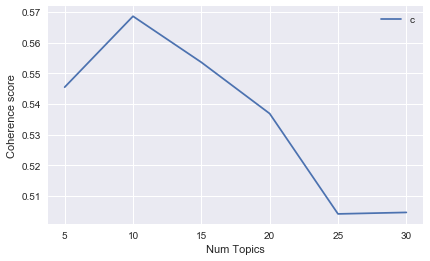

In [237]:
# Show graph
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [238]:
for i, score in enumerate(coherence_values):
    print(f'#{i}\tscore:{score}\t{model_list[i]}')

#0	score:0.5455135956249249	<gensim.models.wrappers.ldamallet.LdaMallet object at 0x27a046630>
#1	score:0.5686570579268624	<gensim.models.wrappers.ldamallet.LdaMallet object at 0x22471b8d0>
#2	score:0.5536323331977064	<gensim.models.wrappers.ldamallet.LdaMallet object at 0x224a4e2b0>
#3	score:0.5368997172746132	<gensim.models.wrappers.ldamallet.LdaMallet object at 0x225658eb8>
#4	score:0.5041564772072175	<gensim.models.wrappers.ldamallet.LdaMallet object at 0x2c4a9a208>
#5	score:0.5046427170310569	<gensim.models.wrappers.ldamallet.LdaMallet object at 0x2c4a9aef0>


In [331]:
# Show Topics
model = model_list[1]
pprint(model.show_topics(formatted=False))

[(0,
  [('trump', 0.019673603832909118),
   ('sex', 0.018715376553376253),
   ('accused', 0.017727204671357986),
   ('woman', 0.012995957478664472),
   ('moore', 0.010810001497230125),
   ('stop', 0.010660278484803115),
   ('resign', 0.009163048360533013),
   ('roy', 0.00820482108100015),
   ('office', 0.008144931876029346),
   ('left', 0.007815541248689923)]),
 (1,
  [('movement', 0.1040167025022592),
   ('woody', 0.02779595525225141),
   ('farrow', 0.026736468168645413),
   ('dylan', 0.025303044467296126),
   ('al', 0.0220934218316662),
   ('allen', 0.019444704122651212),
   ('revolution', 0.01794895765167804),
   ('weinstein', 0.01763734380355863),
   ('resignation', 0.015767660714842167),
   ('sexually', 0.01554953102115858)]),
 (2,
  [('year', 0.07807397731995487),
   ('time', 0.07139464465950246),
   ('person', 0.06432939500089058),
   ('story', 0.035444991984800805),
   ('times', 0.03117021908211126),
   ('years', 0.027993825328029447),
   ('trump', 0.02668764471887431),
   ('si